In [4]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import tensorflow as tf
import os

#이미지 리사이징
def resize_image(image, target_size):
    resized_image = tf.image.resize(image, target_size)
    return resized_image
  
def augment_image(image, count):
    # 이미지 회전
    image = tf.image.rot90(image, k=count)
    
    # 이미지 좌우 반전
    image = tf.image.random_flip_left_right(image)

    #이미지 대비 
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    
    # 이미지 밝기 조절
    image = tf.image.random_brightness(image, max_delta=0.2)
    
    return image

def image_processing(fish, index):
  global images, labels
  # 폴더 경로
  folder_path = f"/content/drive/MyDrive/물고기/{fish}/"
  train_data = []

  # 폴더 내 파일들에 접근하기
  for filename in os.listdir(folder_path):

      # 이미지 파일을 읽어옵니다.
      image = tf.io.read_file(folder_path + f'{filename}')

      # 이미지를 텐서로 변환
      image = tf.image.decode_image(image, channels=3)  # 이미지를 디코딩합니다.

      # 원하는 타겟 크기
      target_size = (100, 100)
      
      # 이미지를 리사이즈합니다.
      resized_image = resize_image(image, target_size)
      # 이미지 정규화
      normalized_image = tf.cast(resized_image, tf.float32) / 255.0
      train_data.append(normalized_image)
      #이미지 증강
      for i in range(1, 5):
        augmented_image = augment_image(normalized_image, i)
        train_data.append(augmented_image)
  train_label = [index] * len(train_data)
  images += train_data
  labels += train_label


In [6]:
#이미지 전처리 
images = []
labels = []
for index, fish in enumerate(['갈치', '고등어', '숭어']):
  image_processing(fish, index)
  # 리사이즈된 이미지를 확인합니다.
  # tf.keras.preprocessing.image.array_to_img(resized_image).show()

In [7]:
#이미지 전처리 
for index, fish in enumerate(['광어', '우럭', '참돔']):
  image_processing(fish, index+3)
  # 리사이즈된 이미지를 확인합니다.
  # tf.keras.preprocessing.image.array_to_img(resized_image).show()

In [8]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
print(len(labels))

17050


In [10]:
# 훈련 데이터, 검증 데이터 나누기
from sklearn.model_selection import train_test_split
train_image, test_image, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=777)

In [11]:
print(len(train_image), len(test_image))

11935 5115


In [12]:
print(train_labels)

[1, 3, 4, 5, 3, 5, 2, 3, 3, 4, 0, 5, 0, 4, 1, 0, 0, 3, 5, 4, 0, 3, 4, 3, 4, 2, 5, 5, 3, 5, 5, 4, 3, 5, 2, 2, 5, 5, 5, 4, 1, 4, 3, 5, 3, 5, 5, 0, 3, 3, 2, 2, 1, 4, 0, 0, 5, 1, 2, 2, 3, 4, 3, 5, 5, 5, 1, 3, 3, 3, 5, 3, 3, 3, 4, 1, 3, 5, 3, 5, 3, 2, 2, 0, 1, 5, 3, 5, 5, 5, 5, 4, 0, 5, 4, 3, 5, 3, 3, 0, 0, 1, 4, 2, 2, 0, 2, 4, 0, 1, 2, 0, 3, 5, 1, 5, 3, 3, 3, 4, 4, 5, 3, 3, 5, 0, 5, 3, 3, 3, 5, 0, 1, 0, 4, 3, 3, 5, 4, 3, 5, 1, 4, 4, 1, 1, 5, 5, 5, 3, 3, 2, 5, 5, 3, 2, 5, 1, 4, 1, 2, 3, 3, 3, 2, 4, 3, 5, 3, 5, 3, 1, 3, 0, 1, 2, 4, 3, 0, 1, 2, 3, 5, 3, 1, 4, 3, 5, 3, 1, 5, 4, 2, 5, 4, 0, 5, 3, 0, 5, 5, 0, 5, 0, 1, 2, 4, 1, 0, 5, 0, 4, 4, 3, 3, 5, 5, 5, 3, 3, 5, 0, 3, 5, 3, 5, 3, 3, 5, 1, 2, 2, 5, 0, 5, 0, 3, 3, 3, 5, 5, 1, 3, 0, 4, 0, 1, 5, 4, 3, 0, 5, 4, 4, 1, 5, 5, 4, 5, 2, 2, 3, 0, 5, 5, 3, 5, 3, 5, 3, 3, 0, 5, 5, 2, 3, 5, 3, 0, 5, 4, 1, 3, 4, 2, 3, 0, 5, 3, 3, 3, 0, 5, 1, 3, 5, 2, 1, 4, 4, 5, 4, 3, 0, 3, 5, 0, 3, 1, 3, 1, 2, 3, 1, 0, 3, 2, 2, 3, 5, 3, 5, 5, 0, 1, 5, 3, 5, 5, 0, 5, 1, 4, 

1,0,5,5,3,3,3,2,5,

2,5,1,5,3,1,5,5,

4,4,3,

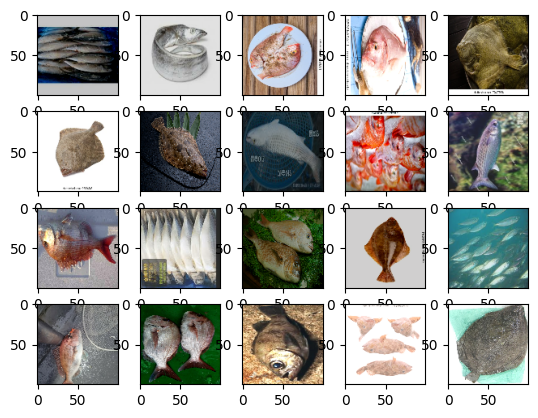

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_image[i*100])
    print(train_labels[i*100], end=",")
plt.show()

In [14]:
#원 핫 인코딩
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes = 6)
test_labels = to_categorical(test_labels, num_classes = 6)

In [15]:
print(train_labels)

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [16]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import backend
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np

In [17]:
train_image = np.array(train_image)
test_image = np.array(test_image)

In [18]:
train_image.shape

(11935, 100, 100, 3)

In [19]:
class CNN(models.Sequential):
  def __init__(self, input_shape, num_classes):
    super().__init__()
    self.add(layers.Conv2D(32, kernel_size=(3,3),
                           activation='relu',
                           strides=(1, 1),
                           padding='same',
                           input_shape=input_shape))
    self.add(layers.BatchNormalization())
    self.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    self.add(layers.BatchNormalization())
    self.add(layers.MaxPooling2D(pool_size=(2,2)))
    self.add(layers.Dropout(0.25))
    self.add(layers.Flatten())
    self.add(layers.Dense(128, activation='relu'))
    self.add(layers.BatchNormalization())
    self.add(layers.Dropout(0.5))
    self.add(layers.Dense(num_classes, activation='softmax'))

    self.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer='adam',
                 metrics=['accuracy'])
  

In [20]:
train_image = train_image.reshape(train_image.shape[0], 100, 100, 3)
test_image = test_image.reshape(test_image.shape[0], 100, 100, 3)

In [21]:
train_image.shape[1:]

(100, 100, 3)

Epoch 1/10
299/299 [==============================] - 505s 2s/step - loss: 1.3805 - accuracy: 0.5320 - val_loss: 2.5154 - val_accuracy: 0.2468
Epoch 2/10
299/299 [==============================] - 479s 2s/step - loss: 0.9712 - accuracy: 0.6369 - val_loss: 1.1583 - val_accuracy: 0.5706
Epoch 3/10
299/299 [==============================] - 497s 2s/step - loss: 0.8156 - accuracy: 0.6898 - val_loss: 1.2474 - val_accuracy: 0.5245
Epoch 4/10
299/299 [==============================] - 493s 2s/step - loss: 0.6638 - accuracy: 0.7471 - val_loss: 0.8391 - val_accuracy: 0.6875
Epoch 5/10
299/299 [==============================] - 477s 2s/step - loss: 0.4792 - accuracy: 0.8269 - val_loss: 1.1905 - val_accuracy: 0.6276
Epoch 6/10
299/299 [==============================] - 492s 2s/step - loss: 0.4034 - accuracy: 0.8586 - val_loss: 0.8458 - val_accuracy: 0.6862
Epoch 7/10
299/299 [==============================] - 491s 2s/step - loss: 0.3227 - accuracy: 0.8878 - val_loss: 1.2327 - val_accuracy: 0.5861

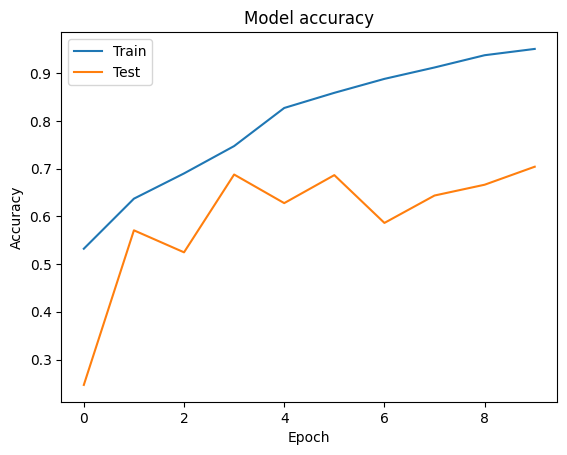

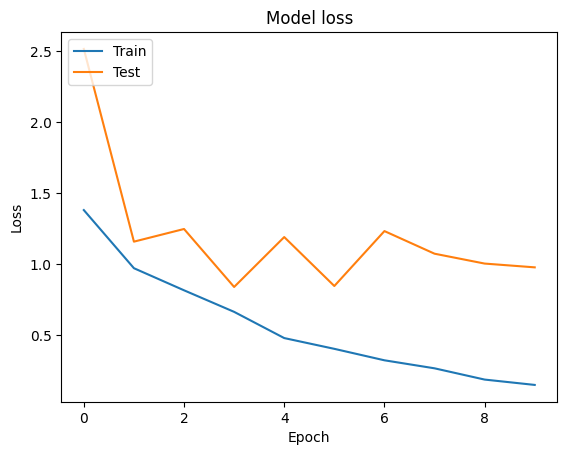

In [23]:
#분류 CNN 학습 및 성능 평가

import matplotlib.pyplot as plot
from keras.models import load_model

def main():
  epochs = 10 #forward pass + backward pass ex)전체 데이터를 10번 학습 
  #epoch 값이 너무 작다면 underfitting이, 너무 크다면 overfitting이 발생할 확률이 높다
  #한 번의 epoch에서 모든 데이터를 한꺼번에 집어넣을 수는 없습니다. 
  #그래서 데이터를 나누어서 주게 되는데 이때 몇 번 나누어서 주는가를 iteration, 각 iteration마다 주는 데이터 사이즈를 batch size라고 합니다.
  batch_size = 32

  model = CNN(train_image.shape[1:], 6)

  #모델 훈련 
  history = model.fit(train_image, train_labels,
            batch_size = batch_size,
            epochs = epochs,
            validation_split = 0.2)
  
  #모델 평가 
  score = model.evaluate(test_image, test_labels)
  print()
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  plot.plot(history.history['accuracy'])
  plot.plot(history.history['val_accuracy'])
  plot.title('Model accuracy')
  plot.ylabel('Accuracy')
  plot.xlabel('Epoch')
  plot.legend(['Train', 'Test'], loc='upper left')
  plot.show()

  plot.plot(history.history['loss'])
  plot.plot(history.history['val_loss'])
  plot.title('Model loss')
  plot.ylabel('Loss')
  plot.xlabel('Epoch')
  plot.legend(['Train', 'Test'], loc='upper left')
  plot.show()

  # 모델 저장
  model.save('/content/drive/MyDrive/fish_model.h5', save_format='h5')

if __name__ == '__main__':
  main()

In [35]:
import numpy as np
from PIL import Image

# 모델 정의
model = CNN(train_image.shape[1:], 6)

def predict_fish(image_path, model):
    # 이미지 로드 및 전처리
    img = Image.open(image_path)
    img = img.resize((100, 100))
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    # 이미지 예측
    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction)
    fish_classes = ['갈치', '고등어', '숭어', '광어', '우럭', '참돔']
    predicted_class = fish_classes[predicted_class_index]

    return predicted_class

# 이미지 파일 경로와 모델을 인자로 넣어서 예측 수행
image_path = "/content/drive/MyDrive/물고기/숭어/숭어1.jpg"
predicted_fish = predict_fish(image_path, model)

# 예측된 물고기 출력
print('Predicted fish:', predicted_fish)


1/1 [==============================] - 0s 228ms/step
Predicted fish: 광어
